# Predicting car prices 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#dp">Data Preparing</a></li>
<li><a href="#mt">Models Training</a></li>
<li><a href="#me">Models Evaluation</a></li>
<li><a href="#co">Conclusion </a></li>
</ul>

<a id='intro'></a>
## Introduction

<b style="color:#4682B4">Problem Statement:</b>



Determining a fair and accurate value for a vehicle in the dynamic automotive market is challenging. Traditional methods struggle to consider the multitude of factors affecting prices, such as make, model, year, mileage, and market trends. Manual appraisals are time-consuming, biased, and often miss the intricate interactions influencing a car's value. Our project aims to address this challenge by developing a precise predictive model, using machine learning algorithms. We seek to automate the pricing process, providing buyers and sellers with a reliable, data-driven assessment of a vehicle's worth in a complex and diverse automotive landscape.


In [53]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.display import display, HTML
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
import warnings
from sklearn.model_selection import GridSearchCV

In [54]:
warnings.filterwarnings('ignore')

<a id='dp'></a>
## Data Preparing

### 1. Loading the datase

In [55]:
# Loading the used cars dataset
df_cars = pd.read_csv('Used_cars.csv')

In [56]:
# output some rows to get an idea about our dataset
df_cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City Exi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### 2. Understanding the data

In [57]:
# Outout the column names
df_cars.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

1- <b style = color:#4682b4>name:</b> The name of the car or a unique identifier for each car. <br>
2- <b style = color:#4682b4>year:</b> The manufacturing year of the car. <br>
3- <b style = color:#4682b4>selling_price:</b> The price at which the car is currently listed for sale. <br>
4- <b style = color:#4682b4>km_driven:</b> The total distance (in kilometers) the car has been driven. <br>
5- <b style = color:#4682b4>fuel:</b> The type of fuel the car uses (e.g., petrol, diesel, electric). <br>
6- <b style = color:#4682b4>seller_type:</b> The type of seller (e.g., individual, dealer) listing the car. <br>
7- <b style = color:#4682b4>transmission:</b> The type of transmission the car has (e.g., manual, automatic). <br>
8- <b style = color:#4682b4>owner:</b> The number of previous owners the car has had. <br>
9- <b style = color:#4682b4>mileage: </b>The fuel efficiency or distance the car can travel per unit of fuel consumed. <br>
10-<b style = color:#4682b4> engine: </b>The engine capacity or size of the car.<br>
11-<b style = color:#4682b4> max_power: </b>The maximum power output of the car's engine.<br>
12-<b style = color:#4682b4> torque:</b> The torque produced by the car's engine.<br>
13-<b style = color:#4682b4> seats: </b>The number of seats in the car.<br>

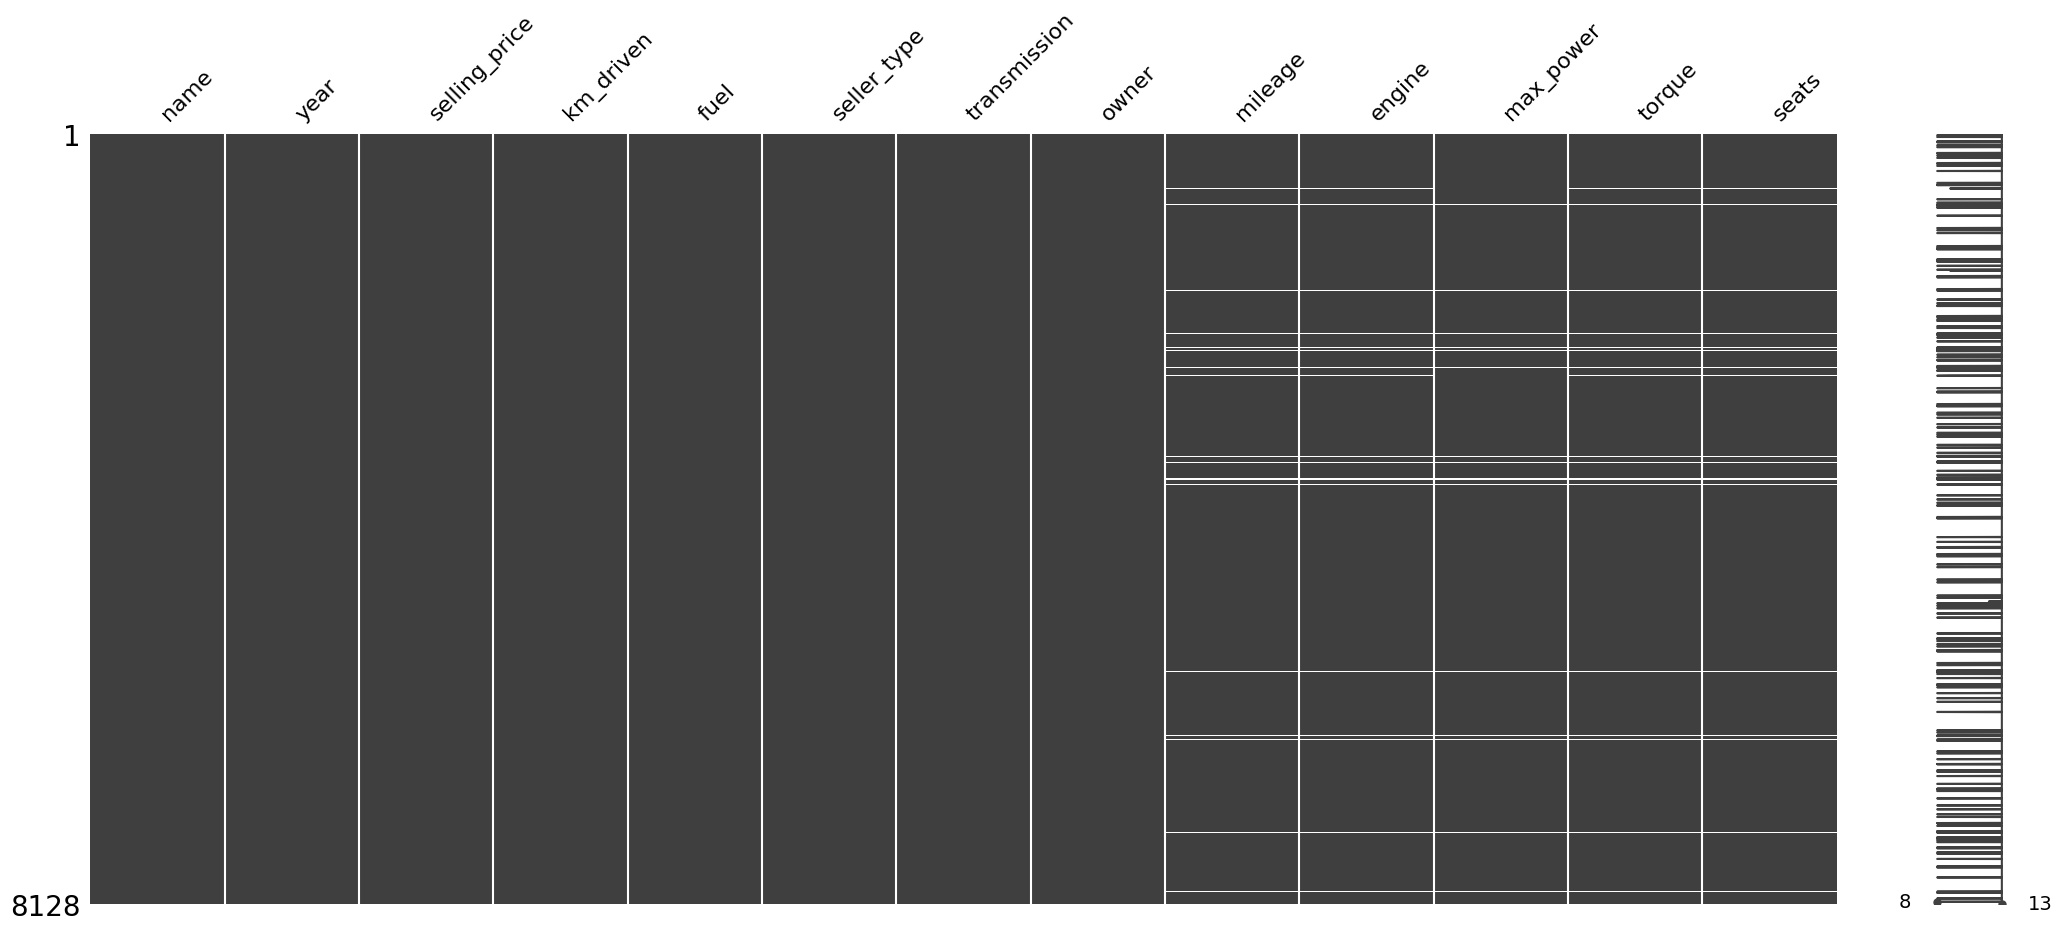

In [58]:
# Matrix chart before the preprocessing 
msno.matrix(df_cars)
plt.savefig("test.png")

Here this matrix chart is used to <b>visualizing missing values</b> in the dataset. <br>


In [59]:
# Output the number of missing values in each column
df_cars.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

The dataset contains missing values in the columns 'mileage,' 'engine,' 'max_power,' 'torque,' and 'seats,' with the number of missing entries as indicated.

In [60]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


The dataset has 8128 entries across 13 columns, with varying counts of non-null values, indicating potential missing data, and includes a mix of data types, such as integers, floats, and objects, providing a snapshot of a dataset primarily comprising information related to used cars.

### 3. Pre-Preprocessing Results

Here we will perferom a Linear regression before we do any preproccing, so later on we can compare the results and see how our data preparing improved the model performance.

In [61]:
# Imputing missing values
imputer = SimpleImputer(strategy='mean')
df_numeric = df_cars.select_dtypes(include=[np.number])
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Splitting dataset
X = df_imputed.drop('selling_price', axis=1)
y = df_imputed['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Training Random Forest
random_forest = RandomForestRegressor(random_state=2023)
random_forest.fit(X_train, y_train)

# Predictions and metrics for Random Forest
y_pred_rf = random_forest.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Training Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Predictions and metrics for Linear Regression
y_pred_lr = linear_regression.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(r2_lr)
# Preparing HTML table for comparison
html = f"""
<table>
    <thead>
        <tr>
            <th>Metric</th>
            <th>Linear Regression</th>
            <th>Random Forest</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>MSE</td>
            <td>{mse_lr:.2f}</td>
            <td>{mse_rf:.2f}</td>
        </tr>
        <tr>
            <td>RMSE</td>
            <td>{rmse_lr:.2f}</td>
            <td>{rmse_rf:.2f}</td>
        </tr>
        <tr>
            <td>MAE</td>
            <td>{mae_lr:.2f}</td>
            <td>{mae_rf:.2f}</td>
        </tr>
        <tr>
            <td>R²</td>
            <td>{r2_lr:.2f}</td>
            <td>{r2_rf:.2f}</td>
        </tr>
    </tbody>
</table>"""

display(HTML(html))


0.1935010037922792


Metric,Linear Regression,Random Forest
MSE,557631557725.70,351726027309.73
RMSE,746747.32,593064.94
MAE,377561.25,250541.27
R²,0.19,0.49


<b>The Random Forest model did much better than the Linear Regression model.</b> It made smaller mistakes in predicting car prices, as shown by the lower numbers for MSE, RMSE, and MAE. Also, the Random Forest model was better at fitting the data, which we can see from its higher R² value.

### 4. Dealing with duplicated records

In [62]:
# Outout the number of duplicated rows
df_cars.duplicated().sum()

1202

In [63]:
# Here we remove duplicate rows from the dataset
df_cars = df_cars.drop_duplicates()
df_cars.shape

(6926, 13)

We dropped duplicate rows (6926 remaining) to <b>ensure our analysis is based on unique and non-redundant data</B>, avoiding distortions or biases caused by repeated entries in the dataset.

### 5. Data Transformation

In [64]:
# Here we remove the rows that contains missing values from the dataset
# df_cars = df_cars.dropna()
# df_cars.shape

We removed rows with missing values (NaN) to have a cleaner dataset (6717 remaining), <b>to ensure our analysis is based on complete and reliable information.</b>

In [65]:
# Convert the currency from Indian rupee to USD
df_cars['selling_price'] = df_cars['selling_price']*0.013

In [66]:
# We extracted the columns 'engine,' 'max_power,' and 'mileage' from the dataser
# for focused analysis or processing of data related to car specifications.
df_cars[['engine', 'max_power','mileage']]

,engine,max_power,mileage
0,1248 CC,74 bhp,23.4 kmpl
1,1498 CC,103.52 bhp,21.14 kmpl
2,1497 CC,78 bhp,17.7 kmpl
3,1396 CC,90 bhp,23.0 kmpl
4,1298 CC,88.2 bhp,16.1 kmpl
...,...,...,...
8121,998 CC,67.1 bhp,18.9 kmpl
8122,1396 CC,88.73 bhp,22.54 kmpl
8123,1197 CC,82.85 bhp,18.5 kmpl
8124,1493 CC,110 bhp,16.8 kmpl


In [67]:
# The measurement unit 'CC' is removed
# The measurement unit 'CC' is removed, considering missing values
df_cars['engine'] = df_cars['engine'].apply(lambda x: str(x).replace(' CC', '') if pd.notnull(x) else x)

In [68]:
# Converting the column data type into float
df_cars['engine'] = df_cars['engine'].astype(float)

In [69]:
# The measurement unit 'bhp' is removed, considering missing values
df_cars['max_power'] = [str(x).replace(' bhp', '') if pd.notnull(x) else x for x in df_cars['max_power']]

In [70]:
df_cars['max_power'] = df_cars['max_power'].replace('', np.nan)

In [71]:
# Converting the column data type into float
df_cars['max_power'] = df_cars['max_power'].astype(float)

In [72]:
mile = []  # Empty list mile is created to store the processed mileage values.

for m in df_cars['mileage']:
    if isinstance(m, float):
        # If the value is already a float, append it directly
        mile.append(m)
    else:
        if re.search(' km/kg', m):
            m = m.replace(' km/kg', '')  # If so remove the measurement ('km/kg')
            # 1 km/kg = 1.40 kmpl
            mile.append(float(m) * 1.40)  # Convert km/kg to kmpl and append it to 'mile'
        else:
            m = m.replace(' kmpl', '')  # Else remove the measurement ('kmpl)
            mile.append(float(m))  # Append it to 'mile'

df_cars['mileage'] = mile  # Update the dataset

In [73]:
df_cars.loc[:,'torque']

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2           12.7@ 2,700(kgm@ rpm)
3        22.4 kgm at 1750-2750rpm
4           11.5@ 4,500(kgm@ rpm)
                  ...            
8121                90Nm@ 3500rpm
8122        219.7Nm@ 1500-2750rpm
8123             113.7Nm@ 4000rpm
8124    24@ 1,900-2,750(kgm@ rpm)
8125               190Nm@ 2000rpm
Name: torque, Length: 6926, dtype: object

In [74]:
torque_nm = []  # Empty list 'torque_nm' is created to store the processed torque values.

for row in df_cars['torque']:
    if isinstance(row, float):
        # If the value is already a float, append it directly
        torque_nm.append(row)
    else:
        # Extract the numerical part of the torque string, removing unnecessary characters
        nm = re.sub(r'[NmatnrpkgRPMKG~/@()-+]', ' ', str(row)).strip().split()[0]

        # Check if the string contains 'KGM' or 'kgm' and the extracted numerical value is less than 100
        if re.search(r'(KGM|kgm)', row) and float(nm) < 100:
            # 1 kgm = 9.8 Newton meter
            torque_nm.append(float(nm) * 9.8)  # Convert kgm to Newton meter and append it to 'torque_nm'
        else:
            torque_nm.append(float(nm))  # Append the extracted numerical value to 'torque_nm'

df_cars['torque_Nm'] = torque_nm  # Update the dataset

In [75]:
# Empty list 'rpm' is created to store the processed RPM values.
rpm = []

for e in df_cars['torque']:
    if isinstance(e, float):
        rpm.append(np.nan)  # If the value is float, append NaN to 'rpm'
    else:
        # Remove unnecessary characters and extract the relevant part of the string
        e = re.sub(r'[NmatnrpkgRPMKG~/@()\-+]', ' ', str(e)).strip()
        e = ' '.join(e.split()[1:])

        # Check if the processed string has a length greater than 0
        if len(e) > 0:
            rpm.append(e.split()[-1].strip().replace(',', ''))  # Extract the RPM value and append it to 'rpm'
        else:
            rpm.append(np.nan)  # If the processed string has length 0, append NaN to 'rpm'

df_cars['max_RPM'] = rpm  # Create a new column 'max_RPM' in the DataFrame and update it with the 'rpm' values

In [76]:
# Converting the column data type into float
df_cars['max_RPM'] = df_cars['max_RPM'].astype(float)

In [77]:
# Fills the missing values in 'max_RPM' with the meadian value 
df_cars['max_RPM'].fillna(df_cars['max_RPM'].median(), inplace = True)

In [78]:
# Extracts brand names from the 'name' column, creating a new 'Brand' column. (only the first word)
df_cars['Brand'] = [x.split()[0] for x in df_cars['name']]

In [79]:
# Here we drops the 'torque' column
df_cars = df_cars.drop('torque',axis = 1)

In [80]:
# Here we create a new column called 'owner_numeric' to indicate the number of owners this car has had
def owner_to_numeric(owner):
    if 'first' in owner.lower():
        return 1
    elif 'second' in owner.lower():
        return 2
    elif 'third' in owner.lower():
        return 3
    elif 'fourth' in owner.lower() or 'fourth & above' in owner.lower():
        return 4
    elif 'test' in owner.lower():
        return 0  # Assuming 'Test Drive Car' should be 0 as it's not really an owner
    else:
        return np.nan  # If the owner is not specified or is unknown
# Apply the function to the 'owner' column
df_cars['owner_numeric'] = df_cars['owner'].apply(owner_to_numeric)

# Check the changes
df_cars[['owner', 'owner_numeric']].head()
df_cars = df_cars.drop(['owner'], axis=1)

In [81]:
# Mapping dictionaries for each categorical column
fuel_mapping = {'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4}
seller_type_mapping = {'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2}
transmission_mapping = {'Manual': 0, 'Automatic': 1}

# Apply the mappings to the columns
df_cars['fuel'] = df_cars['fuel'].map(fuel_mapping)
df_cars['seller_type'] = df_cars['seller_type'].map(seller_type_mapping)
df_cars['transmission'] = df_cars['transmission'].map(transmission_mapping)

# Check the changes
df_cars[['fuel', 'seller_type', 'transmission']].head()

,fuel,seller_type,transmission
0,0,0,0
1,0,0,0
2,1,0,0
3,0,0,0
4,1,0,0


<p>Converting categorical variables like 'fuel', 'seller_type', and 'transmission' into numerical values is a standard practice in preparing data for machine learning models since most algorithms require numerical input.</p>

### 6. Relationships between Numerical variables

<p>The goal here to avoid using variables that hava strong correlations with each other to avoid <b style = color:#4682B4>feature redundancy</b></p>

Why do we really do that???
> ##### - To keep the model simple and improve interpretability
> ##### - When the dataset is large, this will improve our computa

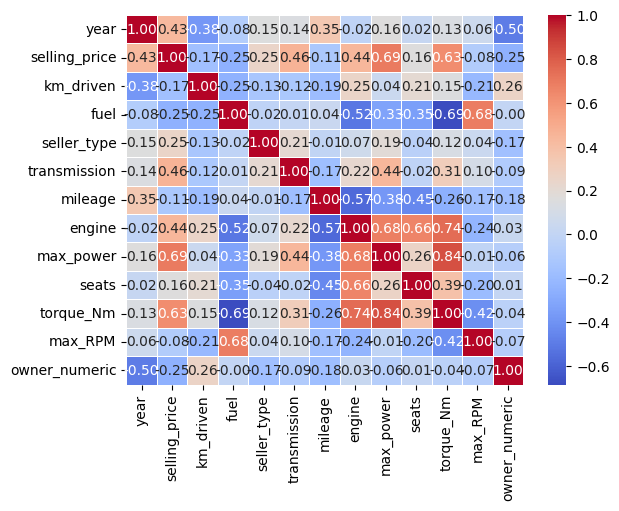

In [82]:
cor = df_cars.corr(numeric_only=True)
sns.heatmap(cor, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.savefig("correlationMatrix.png")
plt.show()
# Positive correlations are represented by warmer colors (closer to 1), typically shades of red.
# Negative correlations are represented by cooler colors (closer to -1), typically shades of blue.
# A correlation of 0 is usually represented by a neutral color (often white or light gray).

Notes from the professor:<bR>
Data leak between the target and the rest columns <br>
information gain investigation


### 7. Feature Engineering

In [83]:
# Creating a new feature 'torque_to_power_ratio' (since we have high correlation between them)
df_cars['torque_to_power_ratio'] = df_cars['torque_Nm'] / (df_cars['max_power'] + 0.000000001)

# Drop the original 'torque_Nm' and 'max_power' columns
df_cars = df_cars.drop(['torque_Nm', 'max_power'], axis=1)

A new feature 'torque_to_power_ratio' is created, representing the ratio of torque to power. This can capture the relationship between torque and power in a single feature.

In [84]:
# Creating a new feature 'mileage_to_engine_ratio'
df_cars['mileage_to_engine_ratio'] = df_cars['mileage'] / (df_cars['engine'] + 0.000000001)

# Drop the original 'mileage' and 'engine' columns
df_cars = df_cars.drop(['mileage', 'engine'], axis=1)

<p></p>

Doing the same for mileage and engine

In [85]:
# Create bins for car age
df_cars['car_age'] = 2020 - df_cars['year']
df_cars = df_cars.drop(['year'], axis=1)

Creating new column which has the age of the car

### 8. Data Visualization (EDA)

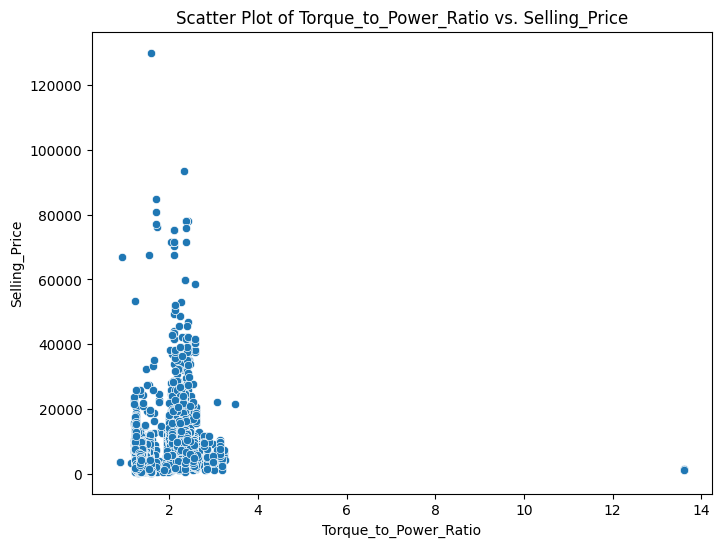

In [86]:
# Scatter plot for 'torque_to_power_ratio' and 'selling_price'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='torque_to_power_ratio', y='selling_price', data=df_cars)
plt.title('Scatter Plot of Torque_to_Power_Ratio vs. Selling_Price')
plt.xlabel('Torque_to_Power_Ratio')
plt.ylabel('Selling_Price')
plt.show()

In [87]:
# To get the outliers
df_cars[ (df_cars['torque_to_power_ratio'] > 12)]

,name,selling_price,km_driven,fuel,seller_type,transmission,seats,max_RPM,Brand,owner_numeric,torque_to_power_ratio,mileage_to_engine_ratio,car_age
951,Maruti Zen D,1105.0,120000,0,0,0,5.0,2250.0,Maruti,3,13.603448,0.013621,17
4720,Maruti Zen D,1560.0,60000,0,0,0,5.0,2250.0,Maruti,2,13.603448,0.013621,18
5143,Maruti Zen D,1040.0,110000,0,0,0,5.0,2250.0,Maruti,2,13.603448,0.013621,14


In [88]:
# To get the outliers
df_cars[df_cars['selling_price'] > 120000]

,name,selling_price,km_driven,fuel,seller_type,transmission,seats,max_RPM,Brand,owner_numeric,torque_to_power_ratio,mileage_to_engine_ratio,car_age
170,Volvo XC90 T8 Excellence BSIV,130000.0,30000,1,0,1,4.0,1740.0,Volvo,1,1.6,0.021331,3


<p>The scatter plot shows how the 'Torque_to_Power_Ratio' of cars relates to their 'Selling_Price'. Most cars have a low 'Torque_to_Power_Ratio', and within this group, selling prices vary. However, when the ratio goes above about 5, selling prices tend to decrease, and there are fewer cars with higher ratios.</p>

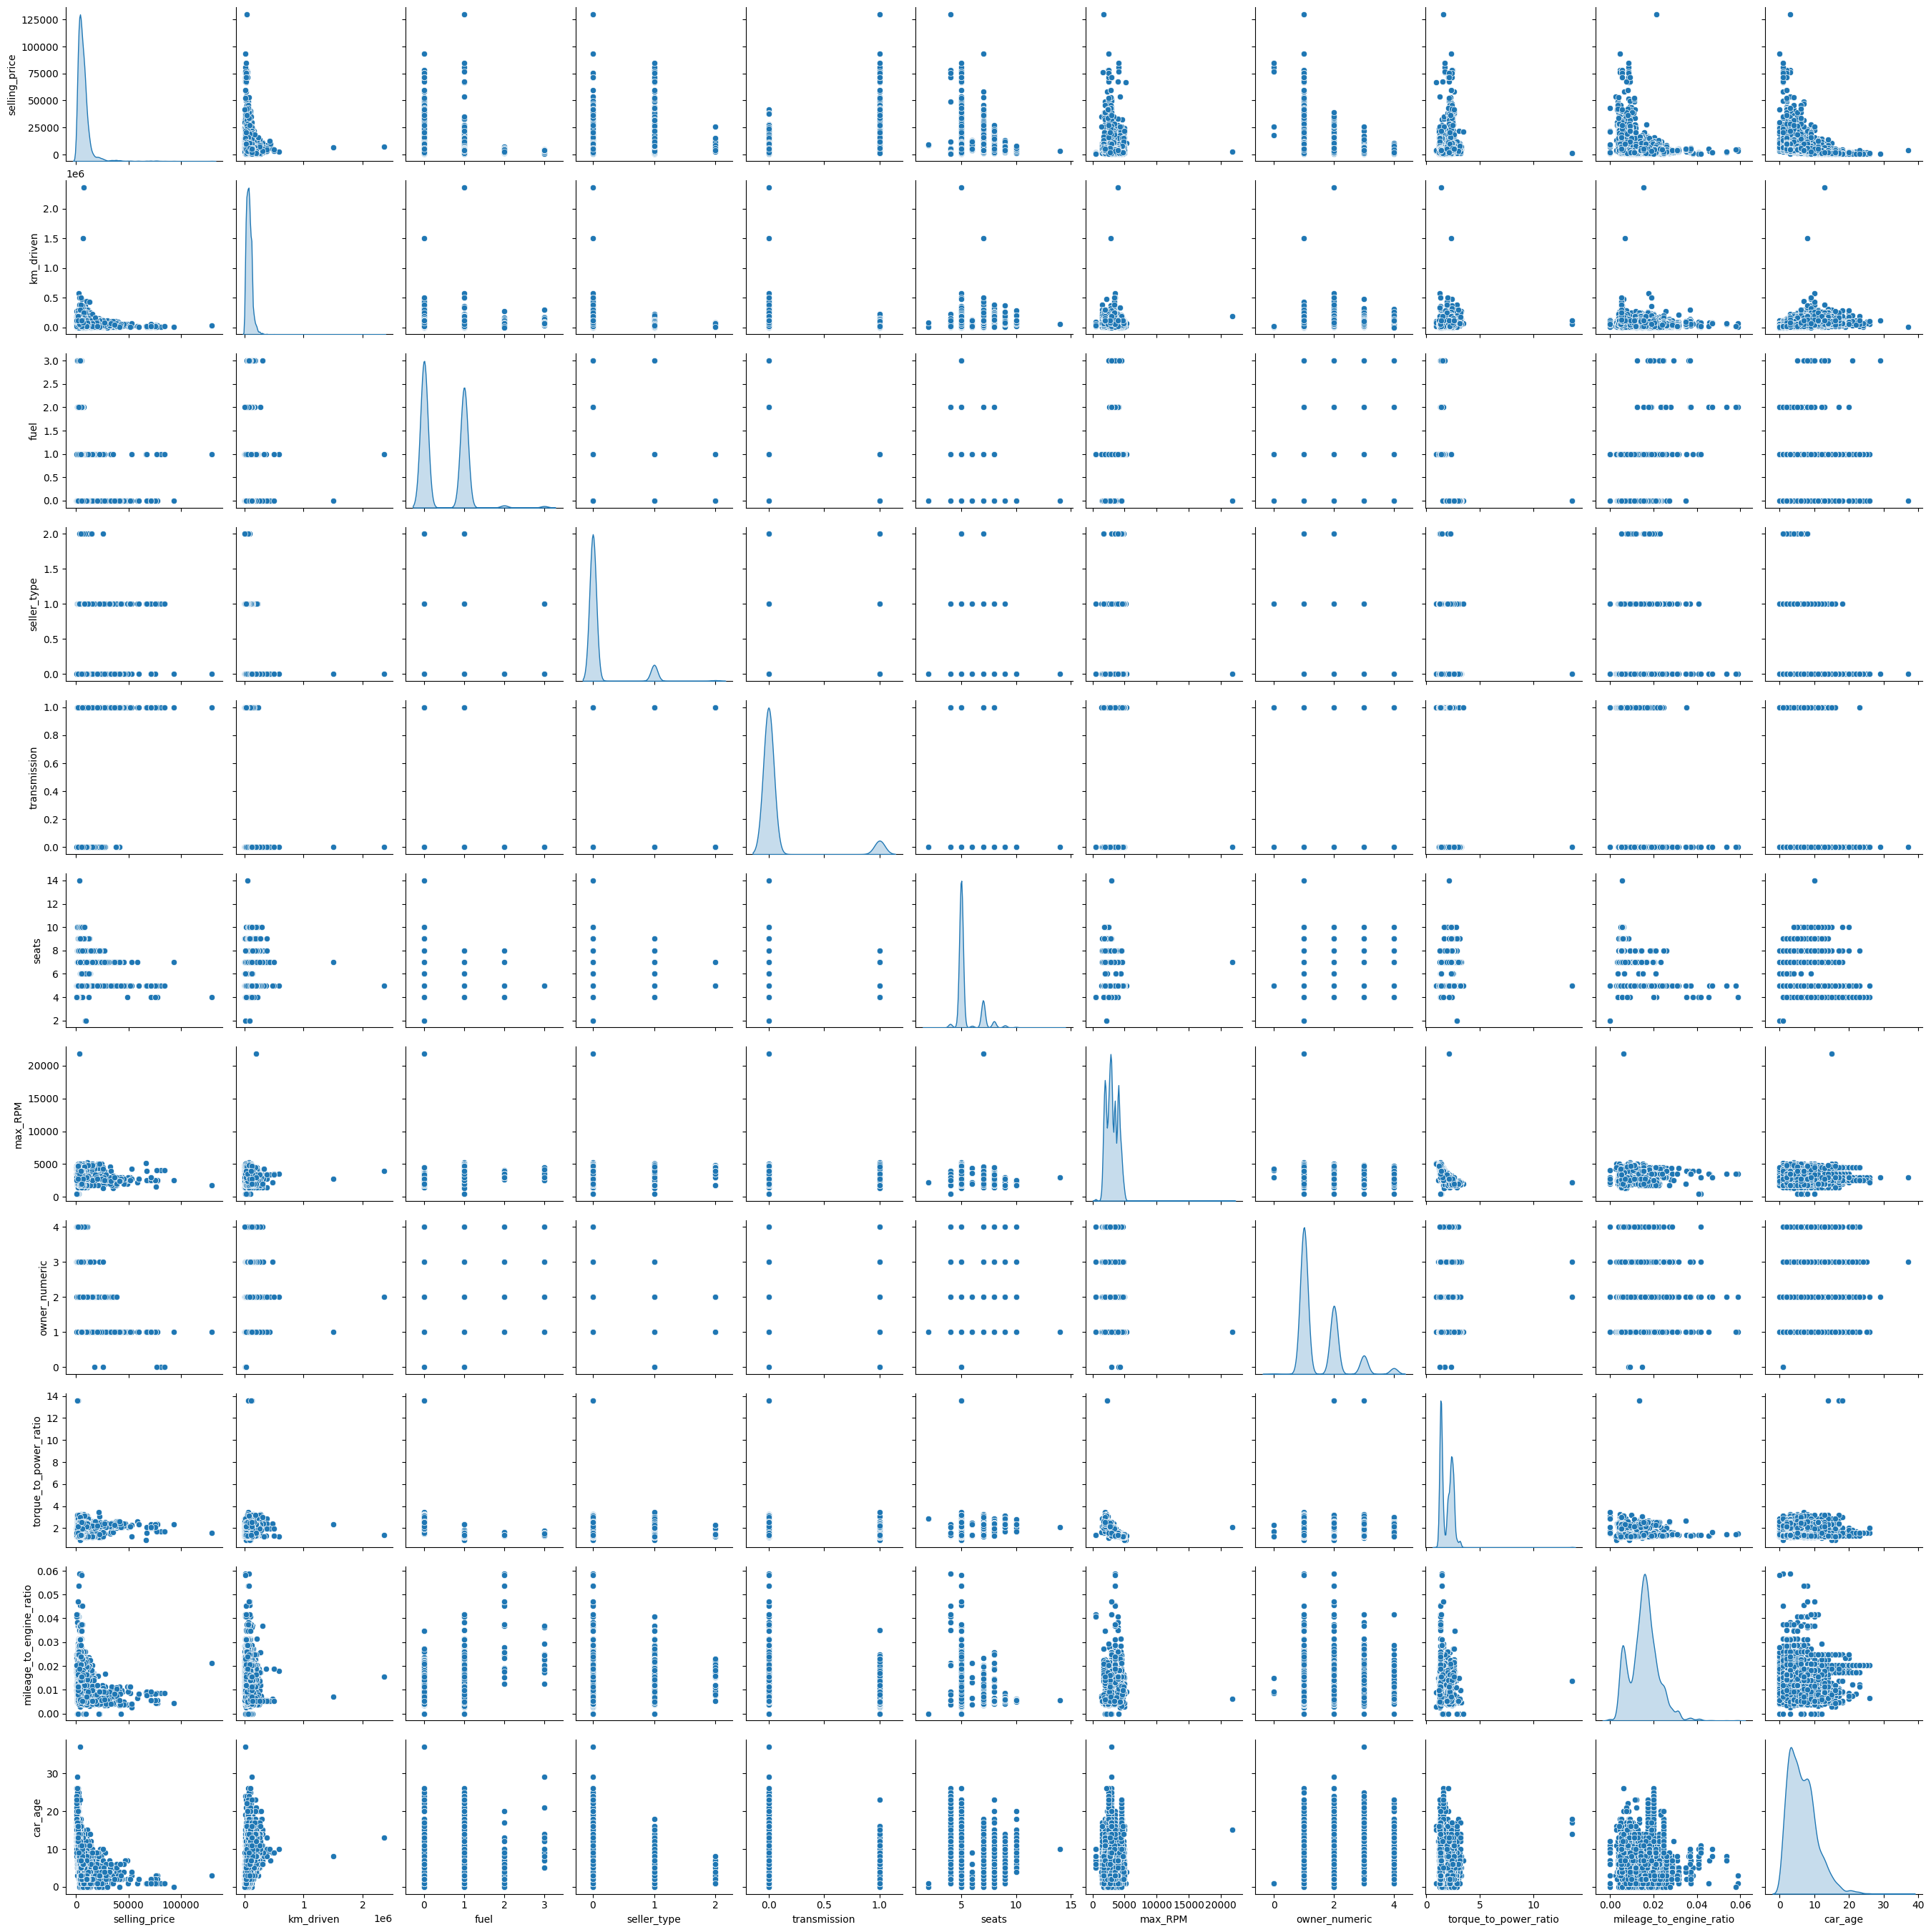

In [89]:
# Pair Plota
sns.pairplot(df_cars, diag_kind='kde')

<p>The pair plots give a comprehensive overview of how each variable relates to the others. However, they do not show how categorical variables such as fuel, seller_type, transmission, and owner relate to the selling price and other variables. </p>

<p style="color:#4682B4">Note: On the diagonal, we see the distribution of each variable. </p>

> Examples:
>> As km_driven increases, the selling price generally seems to decrease, which is a common trend reflecting depreciation. 
>
>> There is no clear trend between the number of seats and the selling price in the scatter plots.
>
>> Car age shows a right skew, meaning there are more younger cars in the dataset than older ones.

<Axes: xlabel='selling_price', ylabel='Count'>

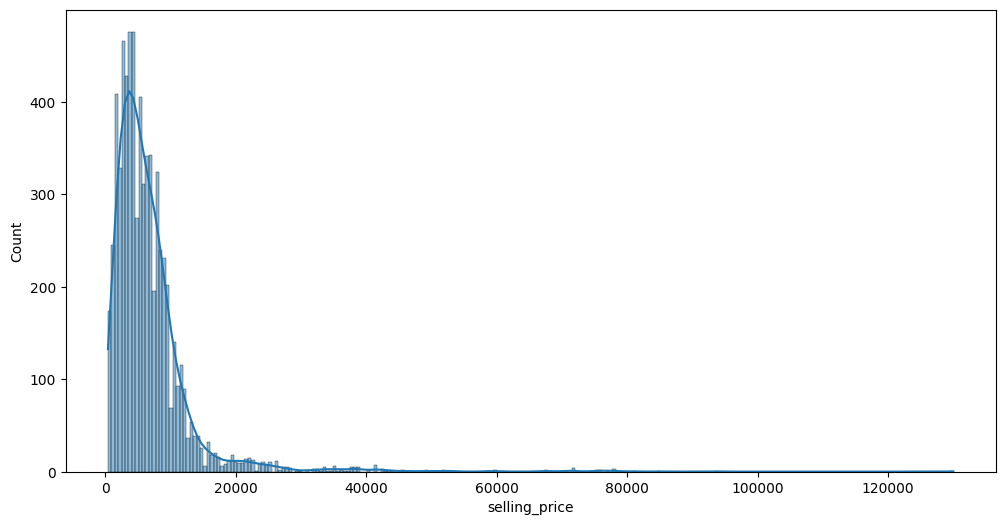

In [90]:
# Histograms
plt.figure(figsize=(12, 6))
sns.histplot(df_cars['selling_price'], kde=True)

<p>The histogram depicts the distribution of the 'selling_price' for a dataset of cars. It shows that the selling price is right-skewed, with the majority of cars clustered at the lower end of the selling price spectrum and fewer cars at the higher price range. The long tail towards the higher selling prices indicates the presence of some high-value outliers in the data.</p>

### 9. Feature Selection

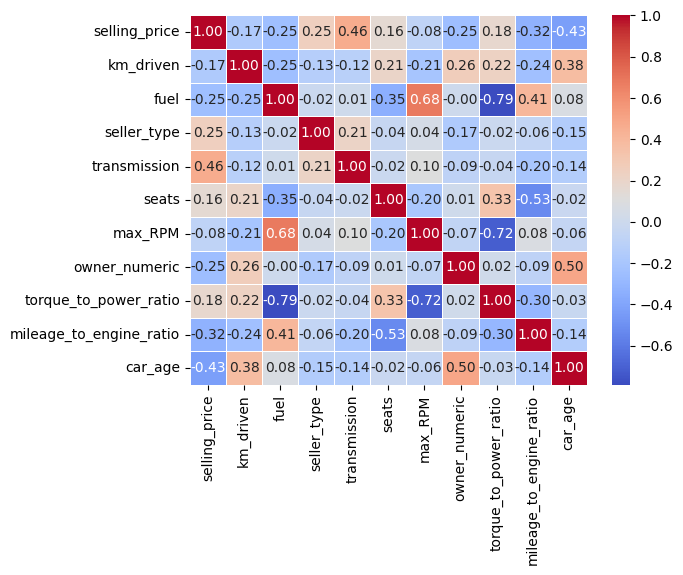

In [91]:
# Display the corrleation matrix with the variables we have so far
cor = df_cars.corr(numeric_only=True)
sns.heatmap(cor, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.show()

In [92]:
df_cars = df_cars.drop(['max_RPM','name'], axis=1)

<p>We will include 'car_age' due to the higher negative correlation between 'car_age' and 'selling_price;, indicating that as the car gets older, its price tends to decrease.</p>
<p>We will choose torque_to_power_ratio over max_RPM due the multicollinearity between them.</p>
<p>In order to reduce the redundancy and to make out model more simpler we will drop the column 'name'</p>

### 10. One Hot Encoding

In [93]:
# Assuming 'df_cars' is your DataFrame
df_cars = pd.get_dummies(df_cars, columns=['Brand'], drop_first=True)
df_cars.info()
df_cars = df_cars * 1

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   selling_price            6926 non-null   float64
 1   km_driven                6926 non-null   int64  
 2   fuel                     6926 non-null   int64  
 3   seller_type              6926 non-null   int64  
 4   transmission             6926 non-null   int64  
 5   seats                    6718 non-null   float64
 6   owner_numeric            6926 non-null   int64  
 7   torque_to_power_ratio    6717 non-null   float64
 8   mileage_to_engine_ratio  6718 non-null   float64
 9   car_age                  6926 non-null   int64  
 10  Brand_Ashok              6926 non-null   bool   
 11  Brand_Audi               6926 non-null   bool   
 12  Brand_BMW                6926 non-null   bool   
 13  Brand_Chevrolet          6926 non-null   bool   
 14  Brand_Daewoo             6926

### 11. Dealing With Missing Values

In [94]:
# Checking for missing values in the encoded_transformed_dataset
missing_values = df_cars.isnull().sum()
missing_values[missing_values > 0]

seats                      208
torque_to_power_ratio      209
mileage_to_engine_ratio    208
dtype: int64

In [95]:
# 1. Identify columns with missing values
missing_columns = missing_values[missing_values > 0].index

# 2. Scaling data excluding missing value columns
scaler = StandardScaler()
non_missing_columns = df_cars.columns.difference(missing_columns)
normalized_data = scaler.fit_transform(df_cars[non_missing_columns])

# 3. Apply K-means clustering
num_clusters = int((len(df_cars) / 2) ** 0.5)
kmeans = KMeans(n_clusters=num_clusters, random_state=2023)
df_cars['cluster'] = kmeans.fit_predict(normalized_data)

# 4. Impute missing values using KNN
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(df_cars)

# 5. Convert back to DataFrame
df_cars = pd.DataFrame(imputed_data, columns=df_cars.columns)

In [96]:
df_cars.head()

,selling_price,km_driven,fuel,seller_type,transmission,seats,owner_numeric,torque_to_power_ratio,mileage_to_engine_ratio,car_age,...,Brand_Nissan,Brand_Opel,Brand_Peugeot,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,cluster
0,5850.0,145500.0,0.0,0.0,0.0,5.0,1.0,2.567568,0.018750,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
1,4810.0,120000.0,0.0,0.0,0.0,5.0,2.0,2.414992,0.014112,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
2,2054.0,140000.0,1.0,0.0,0.0,5.0,3.0,1.595641,0.011824,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0
3,2925.0,127000.0,0.0,0.0,0.0,5.0,1.0,2.439111,0.016476,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,1690.0,120000.0,1.0,0.0,0.0,5.0,1.0,1.277778,0.012404,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 12. PCA

<p> Now it appears that we have a probelm due to the one-hot encoding approach which is a common issue known as the "curse of dimensionality" which can lead to problems like overfitting and sparsity.</p>

We will use a famous technique called <b style = color:#4682B4>PCA</b>

In [97]:
# Splitting target and features.
y = df_cars['selling_price']
X = df_cars.drop('selling_price', axis=1)

# Standardizing features.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Full PCA for variance analysis.
pca = PCA()
pca.fit(X_scaled)
var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determining 80% variance threshold.
comp_80 = np.argmax(var_ratio >= 0.80) + 1

# Applying PCA with 80% variance.
pca_80 = PCA(n_components=comp_80,random_state=2023)
X_pca = pca_80.fit_transform(X_scaled)

# Shapes after PCA.
comp_80, X_pca.shape

(28, (6926, 28))

We chose 80% of variance but we need to keep in mind these pros and cons of our decision.

>Pros:
>>Retains fewer components, which may result in a simpler model with less computational cost.
>
>>By removing more features, you might reduce the chance of the model picking up noise in the training data.
>
>Cons:
>>Discards more variance, which might include some important information relevant to the prediction task.

### 13. Splitting the Dataset into Training and Testing Sets

In [98]:
# Split the dataset into training and testing sets
# The train_test_split function shuffles and splits the data into training and testing sets
# The random_state parameter ensures reproducibilbity of the split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,random_state=2023)

<a id='mt'></a>
## Models Training

### 1. Train a Linear Regression model

<p>Linear Regression is a straightforward algorithm that aims to draw a straight line through your data points. It's like finding the best-fit line that represents the relationship between input features and the target variable. The coefficients of this line tell you how much each feature influences the predicted outcome.</p>

In [99]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model = linear_model.fit(X_train, y_train)

### 2. Train a Random Forest Regressor

<p>Random Forest Regressor builds multiple decision trees and merges their results to improve prediction accuracy and control over-fitting. It works well for complex datasets by capturing nonlinear patterns that a simple linear model may miss.</p>


In [100]:
# Initialize the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=2023)

# Train the Random Forest Regressor on the training data
random_forest_model = random_forest_model.fit(X_train, y_train)

<a id='me'></a>
## Models Evaluation

### 1. Post-Preprocessing Results

Since we are dealing with a <b>regression problem</b>, the corerct metrics are :
> Mean Squared Error (MSE)
>> MSE is the average of squared differences between predicted and actual values. Lower MSE indicates better fit.

> Root Mean Squared Error (RMSE)
>> RMSE is the square root of MSE, providing an interpretable measure of prediction accuracy in the same units as the target variable.

> Mean Absolute Error (MAE)
>> MAE is the average absolute difference between predicted and actual values

> R-squared (R²)
>> R-squared measures how well a regression model explains the variability in the dependent variable.{0,1} R²=>1 : good fit.

In [101]:
# Predictions using the Linear Regression model
y_pred_linear = linear_model.predict(X_test)

# Predictions using the Random Forest model
y_pred_rf = random_forest_model.predict(X_test)

# Calculate evaluation metrics for both models
linear_scores = {
    'MSE': mean_squared_error(y_test, y_pred_linear),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_linear)),
    'MAE': mean_absolute_error(y_test, y_pred_linear),
    'R2': r2_score(y_test, y_pred_linear)
}

rf_scores = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}

html_table = f"""
<table>
    <thead>
        <tr>
            <th>Metric</th>
            <th>Linear Regression</th>
            <th>Random Forest</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>MSE</td>
            <td>{linear_scores['MSE']:.2f}</td>
            <td>{rf_scores['MSE']:.2f}</td>
        </tr>
        <tr>
            <td>RMSE</td>
            <td>{linear_scores['RMSE']:.2f}</td>
            <td>{rf_scores['RMSE']:.2f}</td>
        </tr>
        <tr>
            <td>MAE</td>
            <td>{linear_scores['MAE']:.2f}</td>
            <td>{rf_scores['MAE']:.2f}</td>
        </tr>
        <tr>
            <td>R²</td>
            <td>{linear_scores['R2']:.2f}</td>
            <td>{rf_scores['R2']:.2f}</td>
        </tr>
    </tbody>
</table>
"""
display(HTML(html_table))

Metric,Linear Regression,Random Forest
MSE,19192814.07,5674268.72
RMSE,4380.96,2382.07
MAE,2559.85,1266.64
R²,0.59,0.88


Overall, <b>the Random Forest Regressor is outperforming the Linear Regression model across all the metrics provided.</b> It fits the data better, has smaller average errors, and explains a higher proportion of the variance in car prices. This suggests that <b>the relationship between the features and the car prices is non-linear and complex</b>, which the Random Forest is able to capture more effectively than the Linear Regression model.

### 2. Comparison of Pre- and Post-Preprocessing Results

In this section, we will compare the model's performance before and after the preprocessing steps. This comparison aims to understand the impact of preprocessing on model accuracy and other metrics.

In [102]:
# Prepare the HTML table code
html_combined_table = f"""
<table>
    <thead>
        <tr>
            <th>Metric</th>
            <th>Linear Regression Pre</th>
            <th>Linear Regression Post</th>
            <th>Random Forest Pre</th>
            <th>Random Forest Post</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>MSE</td>
            <td>{mse_lr:.2f}</td>
            <td>{linear_scores['MSE']:.2f}</td>
            <td>{mse_rf:.2f}</td>
            <td>{rf_scores['MSE']:.2f}</td>
        </tr>
        <tr>
            <td>RMSE</td>
            <td>{rmse_lr:.2f}</td>
            <td>{linear_scores['RMSE']:.2f}</td>
            <td>{rmse_rf:.2f}</td>
            <td>{rf_scores['RMSE']:.2f}</td>
        </tr>
        <tr>
            <td>MAE</td>
            <td>{mae_lr:.2f}</td>
            <td>{linear_scores['MAE']:.2f}</td>
            <td>{mae_rf:.2f}</td>
            <td>{rf_scores['MAE']:.2f}</td>
        </tr>
        <tr>
            <td>R²</td>
            <td>{r2_lr:.2f}</td>
            <td>{linear_scores['R2']:.2f}</td>
            <td>{r2_rf:.2f}</td>
            <td>{rf_scores['R2']:.2f}</td>
        </tr>
    </tbody>
</table>
"""
display(HTML(html_combined_table))


Metric,Linear Regression Pre,Linear Regression Post,Random Forest Pre,Random Forest Post
MSE,557631557725.70,19192814.07,351726027309.73,5674268.72
RMSE,746747.32,4380.96,593064.94,2382.07
MAE,377561.25,2559.85,250541.27,1266.64
R²,0.19,0.59,0.49,0.88


The results show a <b>significant improvement in model performance post-preprocessing for both Linear Regression and Random Forest models.</b> The reduction in MSE and RMSE indicates that the models are making predictions closer to the actual values. The decrease in MAE suggests a similar improvement in prediction accuracy. Notably, the R-squared values have increased for both models, which means that a higher proportion of the variance in the target variable is being explained by the models after preprocessing. This overall enhancement is indicative of the effectiveness of the preprocessing steps implemented.

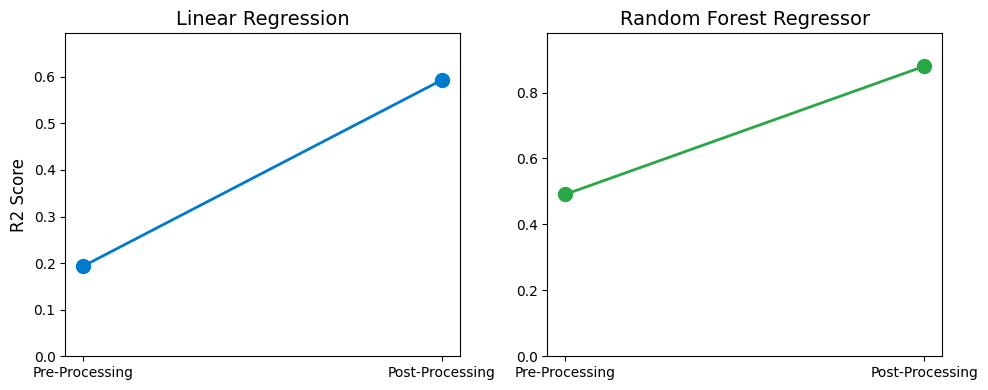

In [103]:
r2_values_lr = [r2_lr, linear_scores['R2']]
r2_values_rf = [r2_rf, rf_scores['R2']]
stages = ['Pre-Processing', 'Post-Processing']

# Create the plots
plt.figure(figsize=(10, 4))

# Plot for Linear Regression
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(stages, r2_values_lr, 'o-', color='#007acc', markersize=10, linewidth=2, markerfacecolor='#007acc')
plt.title('Linear Regression', fontsize=14)
plt.ylabel('R2 Score', fontsize=12)
plt.ylim(0, max(r2_values_lr) + 0.1)

# Plot for Random Forest
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(stages, r2_values_rf, 'o-', color='#28a745', markersize=10, linewidth=2, markerfacecolor='#28a745')
plt.title('Random Forest Regressor', fontsize=14)
plt.ylim(0, max(r2_values_rf) + 0.1)

# Show the plots
plt.tight_layout()
plt.savefig("r2ScoreImprovement.png")
plt.show()

The R-squared metric was chosen for its simplicity to demonstrate the clear improvement in the predictive accuracy of both Linear Regression and Random Forest models after preprocessing. These plots succinctly highlight the <b> effectiveness of preprocessing steps in enhancing model performance.</b>

### 3. Cross Validation

In [105]:

# Cross-validate models
lin_cv = cross_validate(linear_model, X, y, cv=10, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
rf_cv = cross_validate(random_forest_model, X, y, cv=10, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'])

# Compute means and stds
lin_mean = {k: np.mean(v) for k, v in lin_cv.items()}
rf_mean = {k: np.mean(v) for k, v in rf_cv.items()}
lin_std = {k: np.std(v) for k, v in lin_cv.items()}
rf_std = {k: np.std(v) for k, v in rf_cv.items()}

# RMSE calculations
lin_rmse = np.sqrt(-lin_cv['test_neg_mean_squared_error'])
rf_rmse = np.sqrt(-rf_cv['test_neg_mean_squared_error'])
lin_rmse_std = np.std(lin_rmse)
rf_rmse_std = np.std(rf_rmse)

# Generate HTML table
html = f"""
<table>
    <thead>
        <tr>
            <th>Metric</th>
            <th>Lin Reg Mean</th>
            <th>Lin Reg Std</th>
            <th>RF Mean</th>
            <th>RF Std</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>MSE</td>
            <td>{lin_mean['test_neg_mean_squared_error']:.2f}</td>
            <td>{lin_std['test_neg_mean_squared_error']:.2f}</td>
            <td>{rf_mean['test_neg_mean_squared_error']:.2f}</td>
            <td>{rf_std['test_neg_mean_squared_error']:.2f}</td>
        </tr>
        <tr>
            <td>RMSE</td>
            <td>{np.mean(lin_rmse):.2f}</td>
            <td>{lin_rmse_std:.2f}</td>
            <td>{np.mean(rf_rmse):.2f}</td>
            <td>{rf_rmse_std:.2f}</td>
        </tr>
        <tr>
            <td>MAE</td>
            <td>{-lin_mean['test_neg_mean_absolute_error']:.2f}</td>
            <td>{lin_std['test_neg_mean_absolute_error']:.2f}</td>
            <td>{-rf_mean['test_neg_mean_absolute_error']:.2f}</td>
            <td>{rf_std['test_neg_mean_absolute_error']:.2f}</td>
        </tr>
        <tr>
            <td>R²</td>
            <td>{lin_mean['test_r2']:.2f}</td>
            <td>{lin_std['test_r2']:.2f}</td>
            <td>{rf_mean['test_r2']:.2f}</td>
            <td>{rf_std['test_r2']:.2f}</td>
        </tr>
    </tbody>
</table>
"""

display(HTML(html))


Metric,Lin Reg Mean,Lin Reg Std,RF Mean,RF Std
MSE,-16003455.17,9108107.95,-8557674.14,9692485.83
RMSE,3877.78,983.00,2632.81,1275.14
MAE,1987.16,227.24,1129.55,184.75
R²,0.64,0.07,0.84,0.07


<b>The cross-validation results confirm the Random Forest model's superiority over Linear Regression</b>, mirroring the initial train-test split findings. The Random Forest consistently shows <b>lower errors and a high R-squared</b>, indicating stable and accurate predictive performance across different data subsets. The Linear Regression lags with higher errors and less explanatory power, as reflected by its lower R-squared values.

### 4. Final Model Selection

#### 1. Best Model: Random Forest Regressor

The Random Forest Regressor was chosen as our optimal model for predicting car prices. This decision was based on its superior performance, demonstrated by a higher R-squared value compared to Linear Regression, indicating better accuracy and fit. It also showed stability across different data subsets during cross-validation.

#### 2. Limitations and Considerations:

Complexity: The Random Forest model can be hard to understand because it's complex. <br>
Risk of Overfitting: Even with precautions, the model might be too specific to our current data.<br>
Sensitive to Data Changes: The model's accuracy could change if the market or data changes a lot.

<a id='co'></a>
## Conclusion

In this project, we successfully created a model to predict car prices using the Random Forest Regressor. This model proved to be accurate and reliable in our tests. However, it's important to remember that the model might be complex, could overfit, and is sensitive to changes in data or the market. In the future, we plan to keep improving the model by exploring new techniques and updating it with the latest data. Our goal is to make car price predictions even more precise and helpful for everyone.